## Preface: Import Statements

In [1]:
# Data Extraction/Manipulation
import pandas_datareader as wb
from datetime import datetime
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

# Portfolio Optimization
import cvxopt as opt
from cvxopt import blas, solvers

## Chapter I: Data Extraction

In [2]:
symbols = ["TSLA", "TM", "GM", "F", "AAPL", "GOOGL", "IBM"]
names = ["Tesla", "Toyota", "General Motors", "Ford", "Apple", "Google", "IBM"]

start = datetime(2014,1,1)
end = datetime(2020,1,1)

df = wb.DataReader(symbols,'yahoo', start, end)
pd.set_option('display.max_columns', None)
df.head()

Attributes  Adj Close                                                          \
Symbols          TSLA         TM         GM          F       AAPL       GOOGL   
Date                                                                            
2014-01-02  30.020000  98.298386  31.326950  10.896531  17.655001  557.117126   
2014-01-03  29.912001  98.200592  30.271244  10.945931  17.267195  553.053040   
2014-01-06  29.400000  97.923546  30.906195  10.995335  17.361351  559.219238   
2014-01-07  29.872000  98.159859  30.753199  10.854187  17.237186  570.000000   
2014-01-08  30.256001  97.662781  30.921495  10.967103  17.346355  571.186157   

Attributes                  Close                                           \
Symbols            IBM       TSLA          TM         GM      F       AAPL   
Date                                                                         
2014-01-02  140.697495  30.020000  120.629997  40.950001  15.44  19.754642   
2014-01-03  141.539261  29.912001  120.510002  39.570000  15.51  19.320715   
2014-01-06  141.053940  29.400000  120.169998  40.400002  15.58  19.426071   
2014-01-07  143.867477  29.872000  120.459999  40.200001  15.38  19.287144   
2014-01-08  142.547913  30.256001  119.849998  40.419998  15.54  19.409286   

Attributes                            High                                \
Symbols          GOOGL         IBM    TSLA          TM         GM      F   
Date                                                                       
2014-01-02  557.117126  185.529999  30.496  121.599998  41.060001  15.45   
2014-01-03  553.053040  186.639999  30.438  121.290001  40.950001  15.64   
2014-01-06  559.219238  186.000000  30.080  120.980003  40.590000  15.76   
2014-01-07  570.000000  189.710007  30.080  120.589996  40.939999  15.74   
2014-01-08  571.186157  187.970001  30.740  120.180000  40.840000  15.71   

Attributes                                           Low              \
Symbols          AAPL       GOOGL         IBM       TSLA          TM   
Date                                                                   
2014-01-02  19.893929  559.434448  187.399994  29.309999  120.099998   
2014-01-03  19.775000  559.024048  187.350006  29.719999  119.870003   
2014-01-06  19.528572  559.989990  187.360001  29.048000  120.000000   
2014-01-07  19.498571  570.415405  190.350006  29.049999  119.989998   
2014-01-08  19.484285  574.234253  189.419998  29.752001  119.650002   

Attributes                                                            Open  \
Symbols            GM      F       AAPL       GOOGL         IBM       TSLA   
Date                                                                         
2014-01-02  40.340000  15.28  19.715000  554.684692  185.199997  29.959999   
2014-01-03  39.000000  15.30  19.301071  553.018005  185.300003  30.000000   
2014-01-06  39.639999  15.52  19.057142  553.773804  185.300003  30.000000   
2014-01-07  40.099998  15.35  19.211428  561.141113  186.380005  29.524000   
2014-01-08  40.200001  15.51  19.238928  567.212219  187.259995  29.770000   

Attributes                                                                   \
Symbols             TM         GM      F       AAPL       GOOGL         IBM   
Date                                                                          
2014-01-02  121.599998  40.680000  15.42  19.845715  558.288269  187.210007   
2014-01-03  121.000000  40.919998  15.52  19.745001  558.058044  185.830002   
2014-01-06  120.879997  39.900002  15.72  19.194643  557.062073  187.149994   
2014-01-07  120.389999  40.700001  15.73  19.440001  563.063049  186.389999   
2014-01-08  120.180000  40.330002  15.60  19.243214  573.573547  189.330002   

Attributes      Volume                                                 \
Symbols           TSLA        TM          GM           F         AAPL   
Date                                                                    
2014-01-02  30942000.0  239400.0  14763300.0  31528500.0  23468

## Chapter II: Financial Statistics and Data Visualization

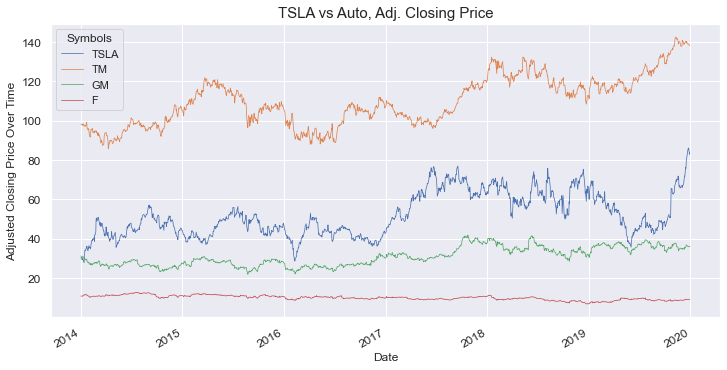

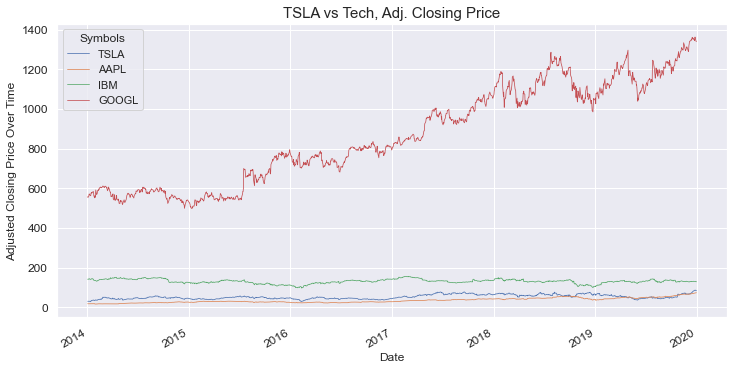

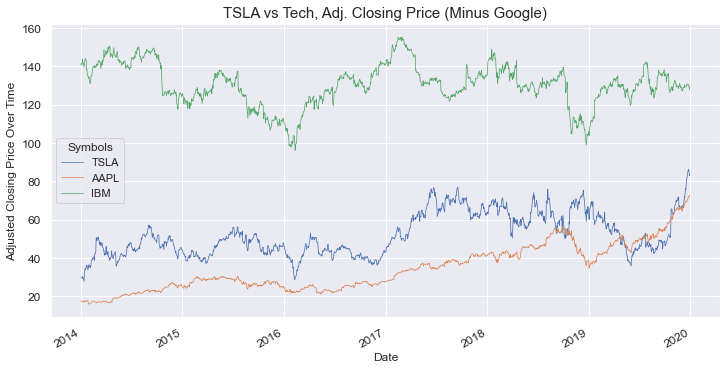

In [3]:
adj_close = df['Adj Close']

adj_close.loc[:, ["TSLA", "TM", "GM", "F"]].plot(figsize=(12,6),linewidth=0.75, grid=True, fontsize=12)
plt.xlabel("Date",fontsize=12)
plt.ylabel("Adjusted Closing Price Over Time",fontsize=12)
plt.title("TSLA vs Auto, Adj. Closing Price",fontsize=15)
plt.show()

adj_close.loc[:, ["TSLA", "AAPL","IBM", "GOOGL"]].plot(figsize=(12,6),linewidth=0.75, grid=True, fontsize=12)
plt.xlabel("Date",fontsize=12)
plt.ylabel("Adjusted Closing Price Over Time",fontsize=12)
plt.title("TSLA vs Tech, Adj. Closing Price",fontsize=15)
plt.show()

adj_close.loc[:, ["TSLA", "AAPL","IBM"]].plot(figsize=(12,6),linewidth=0.75, grid=True, fontsize=12)
plt.xlabel("Date",fontsize=12)
plt.ylabel("Adjusted Closing Price Over Time",fontsize=12)
plt.title("TSLA vs Tech, Adj. Closing Price (Minus Google)",fontsize=15)
plt.show()

In [4]:
# Rate of Return
returns =  adj_close.pct_change()
returns = adj_close[adj_close.notna()]
returns.head()

Symbols,TSLA,TM,GM,F,AAPL,GOOGL,IBM
Date,,,,,,,
2014-01-02,30.020000,98.298386,31.326950,10.896531,17.655001,557.117126,140.697495
2014-01-03,29.912001,98.200592,30.271244,10.945931,17.267195,553.053040,141.539261
2014-01-06,29.400000,97.923546,30.906195,10.995335,17.361351,559.219238,141.053940
2014-01-07,29.872000,98.159859,30.753199,10.854187,17.237186,570.000000,143.867477
2014-01-08,30.256001,97.662781,30.921495,10.967103,17.346355,571.186157,142.547913


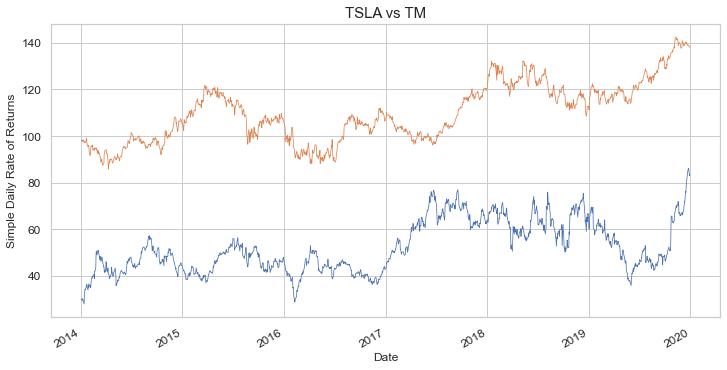

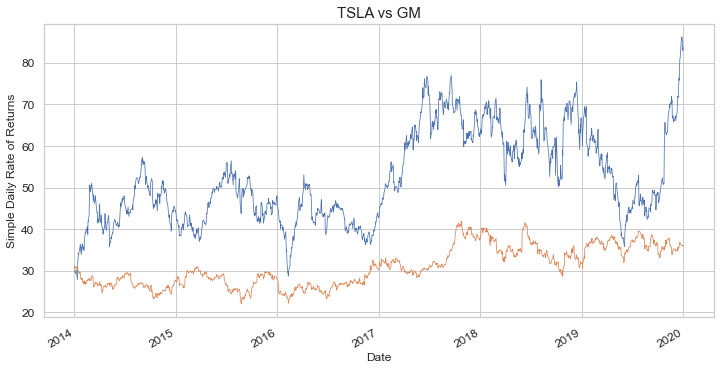

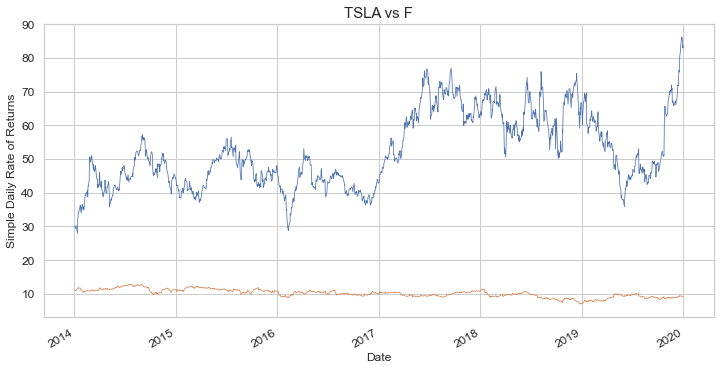

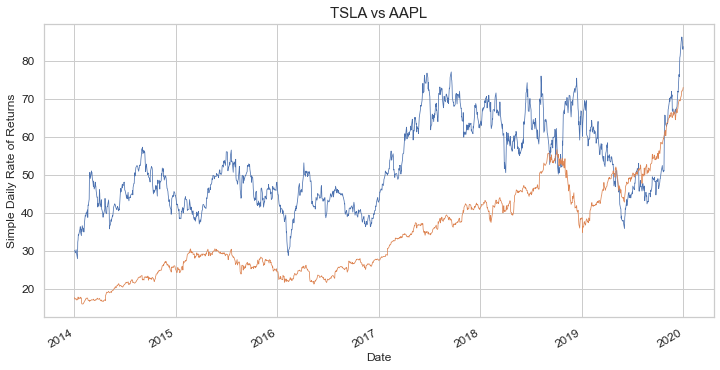

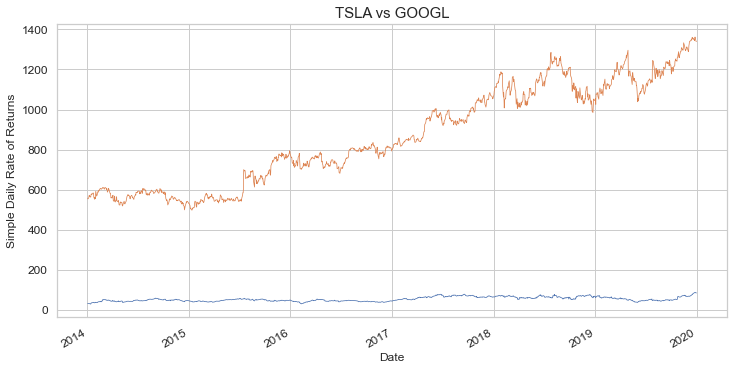

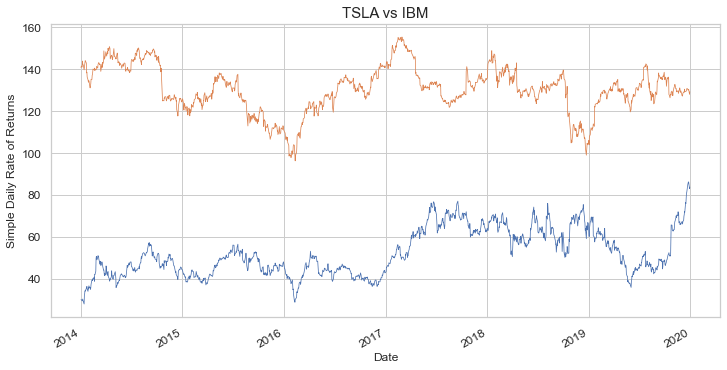

In [5]:
# Rate of Return Visualization
# Rate Return by company over the time
sns.set_style('whitegrid')

for i in range(1, len(symbols)):
    returns["TSLA"].plot(figsize=(12,6),linewidth=0.75, grid=True, fontsize=12)
    returns[symbols[i]].plot(figsize=(12,6),linewidth=0.75, grid=True, fontsize=12)
    plt.xlabel("Date",fontsize=12)
    plt.ylabel("Simple Daily Rate of Returns",fontsize=12)
    plt.title("TSLA vs " + str(symbols[i]),fontsize=15)
    plt.show()

plt.show()

In [6]:
# Rate of Return Summary
avg_returns = returns.mean()
var = returns.var()
std = returns.std()

resume = pd.DataFrame([avg_returns,var,std],index = ['Avg Return','Variance','Std Deviation'])
resume

Symbols,TSLA,TM,GM,F,AAPL,GOOGL,IBM
Avg Return,52.262103,109.893537,30.920178,10.078607,34.397452,867.176322,130.444355
Variance,122.291896,158.720729,22.226301,1.364358,147.157550,60566.191890,119.448826
Std Deviation,11.058567,12.598442,4.714478,1.168057,12.130851,246.101995,10.929265


In [7]:
# Covariance Matrix
cov = returns.cov()
cov

Symbols,TSLA,TM,GM,F,AAPL,GOOGL,IBM
Symbols,,,,,,,
TSLA,122.291896,64.909234,30.896139,-5.785237,82.590530,1716.039192,1.847483
TM,64.909234,158.720729,46.293582,-5.998343,129.542603,2265.726453,-4.015152
GM,30.896139,46.293582,22.226301,-2.387017,44.659476,953.120354,7.614322
F,-5.785237,-5.998343,-2.387017,1.364358,-9.353773,-220.617270,3.953368
AAPL,82.590530,129.542603,44.659476,-9.353773,147.157550,2729.893815,-6.506487
GOOGL,1716.039192,2265.726453,953.120354,-220.617270,2729.893815,60566.191890,-148.385425
IBM,1.847483,-4.015152,7.614322,3.953368,-6.506487,-148.385425,119.448826


In [8]:
# Correlation Matrix
corr = returns.corr()
corr

Symbols,TSLA,TM,GM,F,AAPL,GOOGL,IBM
Symbols,,,,,,,
TSLA,1.000000,0.465898,0.592614,-0.447876,0.615659,0.630541,0.015286
TM,0.465898,1.000000,0.779418,-0.407615,0.847626,0.730761,-0.029160
GM,0.592614,0.779418,1.000000,-0.433469,0.780888,0.821484,0.147777
F,-0.447876,-0.407615,-0.433469,1.000000,-0.660133,-0.767468,0.309679
AAPL,0.615659,0.847626,0.780888,-0.660133,1.000000,0.914407,-0.049075
GOOGL,0.630541,0.730761,0.821484,-0.767468,0.914407,1.000000,-0.055168
IBM,0.015286,-0.029160,0.147777,0.309679,-0.049075,-0.055168,1.000000


## Chapter III: Mean-Variance Portfolio Optimization

In [9]:
# Random Portfolios

def return_portfolios(expected_returns, cov):
    np.random.seed(1)
    port_returns = []
    port_volatility = []
    stock_weights = []
    
    selected = (expected_returns.axes)[0]
    
    num_assets = len(selected) 
    num_portfolios = 1000
    
    for single_portfolio in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        returns = np.dot(weights, expected_returns)
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))
        port_returns.append(returns)
        port_volatility.append(volatility)
        stock_weights.append(weights)
    
        portfolio = {'Returns': port_returns,
                 'Volatility': port_volatility}
    
    for counter,symbol in enumerate(selected):
        portfolio[symbol +' Weight'] = [Weight[counter] for Weight in stock_weights]
    
    df = pd.DataFrame(portfolio)
    
    column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in selected]
    
    df = df[column_order]
   
    return df

random_portfolios = return_portfolios(avg_returns,cov)
random_portfolios.head()

,Returns,Volatility,TSLA Weight,TM Weight,GM Weight,F Weight,AAPL Weight,GOOGL Weight,IBM Weight
0,114.426592,18.483786,0.223587,0.386202,0.000061,0.162096,0.078683,0.049507,0.099863
1,114.747340,19.159233,0.099639,0.114404,0.155362,0.120871,0.197576,0.058952,0.253196
2,133.204691,20.792008,0.009736,0.238339,0.148344,0.198604,0.049905,0.070421,0.284650
3,58.127473,11.374044,0.250255,0.081007,0.178936,0.226510,0.231218,0.021980,0.010094
4,186.171947,40.355838,0.045284,0.234149,0.026223,0.112285,0.255413,0.142164,0.184483


In [10]:
# Optimal Portfolio

def optimal_portfolio(returns):
    n = returns.shape[1]
    returns = np.transpose(returns.values)

    N = 10
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]

    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))

    G = -opt.matrix(np.eye(n))
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] for mu in mus]
    
    # Calculate Risks and Returns For Frontier
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    
    # Calculate 2nd Degree Polynomial Of Frontier Curve
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    
    # Calculate Optimal Portfolio
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

weights, returns, risks = optimal_portfolio(returns[1:])

     pcost       dcost       gap    pres   dres
 0: -1.5759e+03 -9.5702e+02  1e+03  4e+01  5e-02
 1: -1.0820e+03 -5.3690e+02  3e+02  1e+01  1e-02
 2: -6.5240e+02 -3.0657e+02  1e+02  5e+00  5e-03
 3: -3.9842e+02 -2.3016e+02  5e+01  2e+00  2e-03
 4: -1.7746e+02 -2.0741e+02  2e+02  1e+00  1e-03
 5: -1.6405e+02 -1.9149e+02  3e+01  8e-03  8e-06
 6: -1.7174e+02 -1.7251e+02  8e-01  2e-04  2e-07
 7: -1.7228e+02 -1.7229e+02  8e-03  2e-06  2e-09
 8: -1.7228e+02 -1.7228e+02  8e-05  2e-08  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.7326e+02 -4.3671e+02  3e+02  2e+01  2e-02
 1: -4.1252e+02 -3.1139e+02  2e+02  8e+00  8e-03
 2: -2.4593e+02 -1.7400e+02  1e+02  3e+00  3e-03
 3: -1.3016e+02 -1.4038e+02  1e+02  8e-01  8e-04
 4: -1.1476e+02 -1.4689e+02  6e+01  1e-01  1e-04
 5: -1.2287e+02 -1.3147e+02  9e+00  2e-16  3e-16
 6: -1.2837e+02 -1.2911e+02  7e-01  7e-18  5e-17
 7: -1.2902e+02 -1.2903e+02  2e-02  3e-18  6e-17
 8: -1.2903e+02 -1.2903e+02  2e-04  2e-16  1e-1

## Chapter IV: Markowitz Efficient Frontier

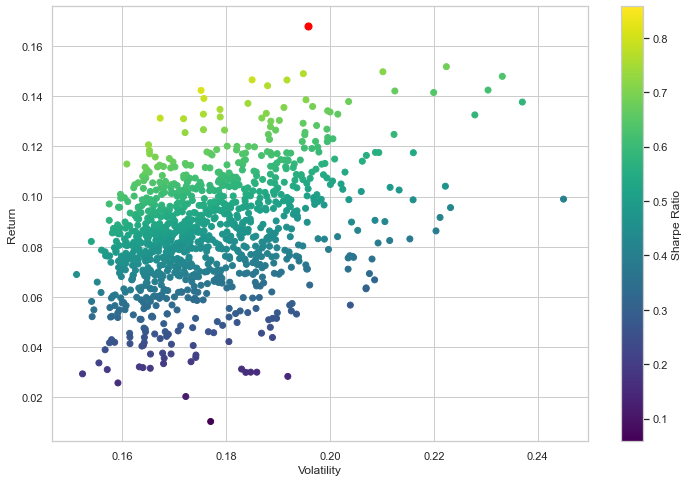

Maximum Sharpe Ratio 0.86 at Index 60


In [11]:
# Pre-Minimization Sharpe Ratio
num_ports = 1000
log_ret = np.log(adj_close/adj_close.shift(1))
all_weights = np.zeros((num_ports, len(adj_close.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(random_portfolios.iloc[x,2:])
    weights = weights/np.sum(weights)
    
    # Save Weights
    all_weights[x,:] = weights
    
    # Expected Return
    ret_arr[x] = np.sum( (log_ret.mean() * weights * 252))
    
    # Expected Volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]
    
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
plt.show()

print("Maximum Sharpe Ratio " + str(round(sharpe_arr.max(), 2)) + " at Index " + str(sharpe_arr.argmax()))

In [12]:
# Post-Minimization Sharpe Ratio

def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
    # the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

cons = ({'type':'eq', 'fun':check_sum})
bounds = ((0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1)) # 7
init_guess = [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25] # 7
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)

print("Post-Minimization Return: " + str(round(get_ret_vol_sr(opt_results.x)[0], 3)))
print("Post-Minimization Volatility: " + str(round(get_ret_vol_sr(opt_results.x)[1], 3)))
print("Post-Minimization Sharpe Ratio: " + str(round(get_ret_vol_sr(opt_results.x)[2], 3)))

Post-Minimization Return: 0.218
Post-Minimization Volatility: 0.22
Post-Minimization Sharpe Ratio: 0.99


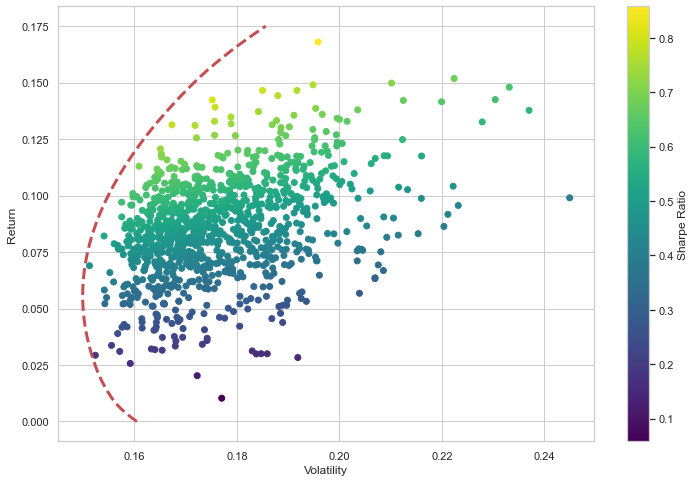

In [13]:
# Markowitz Efficient Frontier Visualization
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

frontier_y = np.linspace(0,0.175,200)
frontier_x = []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP', bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])
    
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(frontier_x,frontier_y, 'r--', linewidth=3)
plt.show()

## Chapter V: Investment Solutions

In [14]:
# Preliminary Calculations
min_volatility = random_portfolios.Volatility.min()
max_volatility = random_portfolios.Volatility.max()
print("Minimum Volatility: " + str(round(min_volatility, 2)))
print("Maximum Volatility: " + str(round(max_volatility, 2)))

min_returns = random_portfolios.Returns.min()
max_returns = random_portfolios.Returns.max()
print("Minimum Returns: " + str(round(min_returns, 2)))
print("Maximum Returns: " + str(round(max_returns, 2)))

Minimum Volatility: 5.22
Maximum Volatility: 135.28
Minimum Returns: 41.82
Maximum Returns: 491.36


In [15]:
# Option 1: Minimum Risk
portfolio_min_volatility = [random_portfolios.iloc[[i]] for i in range(1000) \
                            if (random_portfolios.Volatility[i] == min_volatility) \
                            and (random_portfolios.Returns[i] > min_returns)]
portfolio_min_volatility[0]

,Returns,Volatility,TSLA Weight,TM Weight,GM Weight,F Weight,AAPL Weight,GOOGL Weight,IBM Weight
96,66.450329,5.217602,0.09878,0.185876,0.175632,0.241873,0.068125,0.000929,0.228785


In [16]:
# Option 2: Maximum Returns
portfolio_max_return = [random_portfolios.iloc[[i]] for i in range(1000) \
                            if (random_portfolios.Volatility[i] > min_volatility) \
                            and (random_portfolios.Returns[i] == max_returns)]
portfolio_max_return[0]

,Returns,Volatility,TSLA Weight,TM Weight,GM Weight,F Weight,AAPL Weight,GOOGL Weight,IBM Weight
240,491.362402,135.275207,0.062718,0.089472,0.073022,0.119823,0.087707,0.539917,0.02734


In [17]:
# Option 3: Moderate Risk/Return
portfolio_moderate = []
for i in range(num_ports):
    if (random_portfolios["Returns"][i] > max_returns and random_portfolios["Volatility"][i] < max_volatility):
        portfolio_moderate.append(i)
portfolio_moderate

[]